# TITLE : MODELS OF SATURATION PRESSURE FROM COMPOSITIONAL DATA MWC7+  TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF SATURATION PRESSURE USING WIDE RANGE OF COMPOSITION DATA AND THIS FILE SHOWS WORK WITH ONE LESS FEATURES (SGC7+) WHICH MULTICOLINEAR WITH MWC7+.

THIS FILE AUTOMATICALLY FIT MODELS AND STORE MODELS AT GIVEN PATH 

IF REVIEWER WANT TO CHECK SIMILLAR MODELS USED TO PREDICT TEST OR NOT WHICH TRAINED HERE THAN IN MODEL VALIDATION FILE OPTIMIZED PARAMETER CAN BE CKECKED WHICH AVOID RETRINING WHICH TAKE A LOT TIME AS WELL AS TO CHECK DATA TRAIN AND TEST ALREADY SEPRATED AND STAROED INTO DATASOURCE FROM PREPROCESSING FILE SAME DATA USED HERE WHICH VERIFIED BY CHEKING EXCEL FILES 


ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, XGB , ANN

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error


#Model saving
import pickle


<ipython-input-1-1ef187d9cf9b>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
#Enter the folder path inside which training and testing file located
path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\DATASOURCE\\"

#Enter training file name
file_name = "TRAIN.csv"

#Enter Path where models are stored after optimization of hyperparameter
model_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\MODELS\\"

#Enter the path where realted inforamtion from this file to export at that location
export_data_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\EXPORTED DATA\\"


#Read training files
train = pd.read_csv(path+file_name)

In [3]:
train.head()

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,Psat
0,0.0,0.0025,0.0024,0.4091,0.10380,0.09010,0.05130,0.03280,0.0221,0.2858,182.000000,422.038889,207.006803
1,0.0,0.0034,0.0025,0.0407,0.03110,0.04880,0.05670,0.05520,0.0551,0.7067,227.717637,344.000000,26.000000
2,0.0,0.0015,0.0065,0.3048,0.07270,0.05150,0.02040,0.01960,0.0276,0.4954,239.000000,327.594444,113.605442
3,0.0,0.0007,0.0006,0.4206,0.01551,0.00209,0.00312,0.00439,0.0060,0.5470,296.569594,330.400000,175.500000
4,0.0,0.0178,0.0024,0.2504,0.07190,0.09320,0.07330,0.04760,0.0307,0.4097,253.331649,362.900000,127.000000


In [4]:
X_train = train.drop("Psat",axis = 1)
y_train = train.Psat

                              #### Scalling Dataset ####

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [6]:
#following model path follows for all models location
scaler_file = 'scaler.sav'
pickle.dump(scaler , open(model_path+scaler_file , "wb") )

##### .......................................................................................SectionBreak.......................................................................................

## 1. Linear Regression Model

                              #### Calculate VIF for features ####

In [7]:
VIF = [variance_inflation_factor(x_train , i) for i in range(0,x_train.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [8]:
VIF_DataFrame = pd.DataFrame(VIF)
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)
VIF_DataFrame["FEATURES"] = X_train.columns
VIF_DataFrame = VIF_DataFrame[["FEATURES" , "VIF"]]
VIF_DataFrame

,FEATURES,VIF
0,H2S,1.132430
1,N2,1.182256
2,CO2,1.315396
3,C1,7.430661
4,C2,6.173437
5,C3,12.630215
6,C4,14.098662
7,C5,6.314385
8,C6,2.608042
9,C7+,8.776613


In [9]:
VIF_DataFrame.to_excel(export_data_path+"VIF.xlsx")

                              #### Model Fitting for linear regression ####

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

                         #### Model Summary #### 

In [11]:
x_train_linear_summary = sm.add_constant(x_train, prepend=False)
y_train_linear_summary = y_train

In [12]:
linear_summary = sm.OLS(y_train_linear_summary ,  x_train_linear_summary).fit()

In [13]:
linear_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Psat   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     284.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.59e-117
Time:                        12:17:49   Log-Likelihood:                -907.55
No. Observations:                 210   AIC:                             1841.
Df Residuals:                     197   BIC:                             1885.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.0178      1.382      2.908      0.004       1.293       6.743
x2             4.6453      1.412      3.290      0.001       1.861       7.429
x3             6.2135      1.489      4.173      0.000       3.277       9.150
x4            74.0409      3.539     20.920      0.000      67.061      81.021
x5             6.7282      3.226      2.086      0.038       0.366      13.090
x6           -10.2829      4.614     -2.228      0.027     -19.383      -1.183
x7             9.7436      4.875      1.999      0.047       0.129      19.358
x8             1.5737      3.263      0.482      0.630      -4.860       8.008
x9            -4.2496      2.097     -2.027      0.044      -8.385      -0.114
x10            7.7609      3.847      2.018      0.045       0.175      15.347
x11           -2.6883      1.940     -1.386      0.167      -6.515       1.138
x12           10.9566      1.780      6.156      0.000       7.446      14.467
const        145.2418      1.298    111.863      0.000     142.681     147.802
==============================================================================
Omnibus:                       14.288   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.921
Skew:                           0.343   Prob(JB):                     2.35e-06
Kurtosis:                       4.578   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                    #### Model Saving ####

In [14]:
linear_file = 'linear_model.sav'
pickle.dump(linear_regression , open(model_path+linear_file , "wb") )

## 2. SVR MODEL

                              #### Model tuning for svr Regression ####

In [15]:
svr_model = SVR()

In [16]:
svr_para = {'C':range(4000,9000,100),'gamma':np.arange(0.000,0.002,0.0001)}
svr_grid = GridSearchCV(svr_model,svr_para, cv = 5 , verbose=3, n_jobs=-1)

In [17]:
svr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 4811 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    6.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': range(4000, 9000, 100),
                         'gamma': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [18]:
svr_grid.best_params_

{'C': 5700, 'gamma': 0.0019}

In [19]:
svr_best_para = svr_grid.best_params_

In [20]:
svr_regression = SVR( C = svr_best_para["C"],
                      gamma = svr_best_para["gamma"])
svr_regression.fit(x_train,y_train)

SVR(C=5700, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0019,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

                                          #### Model saveing #### 

In [21]:
svr_file = 'svr_model.sav'
pickle.dump(svr_regression , open(model_path+svr_file , "wb") )

## 3. Decision Tree Model 

                                          #### Model tuning #### 

In [22]:
dt_model = DecisionTreeRegressor()

In [23]:
dt_para = {
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,7,1),
    'min_samples_split': range(2,7,1),
    'splitter' : ['best', 'random']
    }

In [24]:
dt_grid = GridSearchCV(estimator=dt_model,
                     param_grid=dt_para,
                     cv=5,
                     n_jobs =-1,
                     verbose=3)
dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 17672 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed:    9.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 7),
                  

In [25]:
dt_grid.best_params_

{'criterion': 'mae',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'best'}

In [26]:
dt_best_para = dt_grid.best_params_

In [27]:
dt_regression = DecisionTreeRegressor(criterion = dt_best_para["criterion"],
                                      max_depth = dt_best_para["max_depth"],
                                      min_samples_leaf = dt_best_para["min_samples_leaf"],
                                      min_samples_split = dt_best_para["min_samples_split"],
                                      splitter = dt_best_para["splitter"],
                                      random_state = 0
                                      )

dt_regression.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

                                          #### Model saveing #### 

In [28]:
#model_path = 'C:\\STUDY DRIVE\\Mtech New\\DENSITY PREDICTION\\MODELS\\SATURATION PRESSURE PREDICTION SATURATION DATASET 2 PART 4 MODELS\\'
dt_file = 'dt_model.sav'
pickle.dump(dt_regression , open(model_path+dt_file , "wb") )

## 4. Random forest Model 

                                          #### Model parameter tuning #### 

In [29]:
rf_model = RandomForestRegressor()

In [30]:
rf_para = {
    "n_estimators" : range(90,150,5),
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

rf_grid = GridSearchCV(estimator=rf_model,
                           param_grid=rf_para,
                           cv=5,
                           n_jobs =-1,
                           verbose = 3)

In [31]:
rf_grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 9168 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 10768 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 12496 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 16336 tasks      | elapsed: 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
rf_grid.best_params_

{'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 120}

In [33]:
rf_best_para = rf_grid.best_params_

                                          #### Model fiting with tuning #### 

In [34]:
rf_regression = RandomForestRegressor(n_estimators = rf_best_para["n_estimators"],
                                      max_depth = rf_best_para["max_depth"],
                                      min_samples_leaf =rf_best_para["min_samples_leaf"],
                                      min_samples_split = rf_best_para["min_samples_split"],
                                      max_features = rf_best_para["max_features"],
                                      random_state = 0
                                      )

rf_regression.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

                                          #### Model Saving #### 

In [35]:
rf_file = 'rf_model.sav'
pickle.dump(rf_regression , open(model_path+rf_file , "wb") )

## 5. KNN Model

In [36]:
knn_model = KNeighborsRegressor()

In [37]:
knn_para = {"n_neighbors"  : range(2,11)}
knn_grid = GridSearchCV(knn_model,knn_para, verbose=3, n_jobs=-1)

In [38]:
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(2, 11)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [39]:
knn_grid.best_params_

{'n_neighbors': 2}

In [40]:
knn_best_para = knn_grid.best_params_

In [41]:
knn_regression = KNeighborsRegressor( n_neighbors = knn_best_para["n_neighbors"])

knn_regression.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

                                          #### Model Saving #### 

In [42]:
knn_file = 'knn_model.sav'
pickle.dump(knn_regression , open(model_path+knn_file , "wb") )

## 6. XGB Model

In [43]:
xgb_model = XGBRegressor()

In [44]:
xgb_para={
   
    'learning_rate': np.arange(0.1,0.2,0.04),
    'max_depth': range(2,10,1),
    'n_estimators':range(90,150,10),
    "gamma" : np.arange(0.1,0.5,0.3),
    "min_child_weight": range(1,10,2)
}

In [45]:
xgb_grid = GridSearchCV(xgb_model,xgb_para, cv = 5 , verbose=3, n_jobs=-1)

In [46]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [47]:
xgb_grid.best_params_

{'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 90}

In [48]:
xgb_best_para = xgb_grid.best_params_

In [49]:
xgb_regression = XGBRegressor(
                    learning_rate = xgb_best_para["learning_rate"],
                    max_depth = xgb_best_para["max_depth"],
                    n_estimators = xgb_best_para["n_estimators"],
                    gamma = xgb_best_para["gamma"],
                    min_child_weight = xgb_best_para["min_child_weight"]
                    )
xgb_regression.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
xgb_file = 'xgb_model.sav'
pickle.dump(xgb_regression , open(model_path+xgb_file , "wb") )

## 7. ANN Model

In [51]:
def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.Input(shape=x_train.shape[1]))
    
    for i in range(hp.Int('layers', 2, 15)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=3,
                                            max_value=15,
                                            step=1),
                               activation=hp.Choice('act_' + str(i),["relu","tanh"])))
        
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [52]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=50,
    executions_per_trial=3,
    project_name = "ANN")

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 15, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)

In [55]:
tuner.search(x_train, y_train.values,
             epochs=100,
             validation_split = 0.20,
             callbacks=[early_stop])

Trial 50 Complete [00h 00m 11s]
val_mean_squared_error: 12491.663736979166

Best val_mean_squared_error So Far: 345.9986877441406
Total elapsed time: 00h 09m 22s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.results_summary()

Results summary
Results in .\ANN
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
layers: 11
units_0: 11
act_0: tanh
units_1: 9
act_1: tanh
learning_rate: 0.01
units_2: 6
act_2: tanh
units_3: 4
act_3: tanh
units_4: 11
act_4: tanh
units_5: 8
act_5: tanh
units_6: 8
act_6: relu
units_7: 8
act_7: tanh
units_8: 5
act_8: relu
units_9: 9
act_9: relu
units_10: 11
act_10: relu
units_11: 6
act_11: tanh
units_12: 5
act_12: tanh
units_13: 10
act_13: tanh
Score: 345.9986877441406
Trial summary
Hyperparameters:
layers: 3
units_0: 3
act_0: tanh
units_1: 15
act_1: tanh
learning_rate: 0.01
units_2: 7
act_2: relu
units_3: 14
act_3: relu
units_4: 4
act_4: tanh
units_5: 14
act_5: tanh
units_6: 11
act_6: relu
units_7: 4
act_7: relu
units_8: 3
act_8: tanh
units_9: 14
act_9: tanh
units_10: 8
act_10: tanh
units_11: 4
act_11: relu
units_12: 13
act_12: tanh
units_13: 7
act_13: relu
Score: 402.15643310546875
Trial summary
Hyperparameters:
layers: 4
u

In [57]:
'''This link has proved that while showing summary of result number of unit shows higher than 
    actual number of layers which reported as bug in official keras documents.
    However it has been proven that finalized model description can be obtained by following.
    Use number of layer shown as number_layer arguments [i.g best model with number_layer = 4
    units_0 to units_3 in our case. Avoid higher values.]
    
    https://github.com/keras-team/keras-tuner/issues/66#issuecomment-525923517'''
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                143       
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 11)                55        
                                                                 
 dense_5 (Dense)             (None, 8)                 96        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [58]:
ann_best_para = tuner.get_best_hyperparameters()[0].values

In [59]:
ann_regression = Sequential()


#Input layer 
ann_regression.add(tf.keras.Input(shape=x_train.shape[1]))

limit = ann_best_para["layers"] 

#Number of hidden layer
for i in range(0, limit) :
    ann_regression.add(Dense(units=ann_best_para['units_'+str(i)],activation=ann_best_para['act_'+str(i)]))

    
#Last Output Layer
ann_regression.add(Dense(units=1,activation='linear'))



#ANN compilation with loss function and optimization
ann_regression.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=ann_best_para['learning_rate']))

In [60]:
early_stop_final = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)

In [61]:
ann_regression.fit(x=x_train, 
          y=y_train, 
          epochs=1000,
          validation_split=0.20, 
          verbose=1,
          callbacks=[early_stop_final],
          )

Epoch 1/1000
6/6 [==============================] - 1s 29ms/step - loss: 25681.0625 - val_loss: 33032.4648
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 25519.0215 - val_loss: 32627.6641
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 25028.6543 - val_loss: 31687.0293
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 24036.9297 - val_loss: 30088.0293
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 22410.2656 - val_loss: 27460.8750
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 19772.0371 - val_loss: 23295.7773
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 15810.9951 - val_loss: 17473.6465
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 11068.5293 - val_loss: 10936.3584
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 6904.5767 - val_loss: 6734.9858
Epoch 10/1000
6/6 [============================

Epoch 79/1000
6/6 [==============================] - 0s 4ms/step - loss: 5958.9502 - val_loss: 6630.1665
Epoch 80/1000
6/6 [==============================] - 0s 3ms/step - loss: 5947.3696 - val_loss: 6766.5425
Epoch 81/1000
6/6 [==============================] - 0s 4ms/step - loss: 5953.3154 - val_loss: 6830.9165
Epoch 82/1000
6/6 [==============================] - 0s 4ms/step - loss: 5994.0015 - val_loss: 7077.7417
Epoch 83/1000
6/6 [==============================] - 0s 4ms/step - loss: 5971.8242 - val_loss: 6899.9897
Epoch 84/1000
6/6 [==============================] - 0s 4ms/step - loss: 5955.0474 - val_loss: 6694.1294
Epoch 85/1000
6/6 [==============================] - 0s 4ms/step - loss: 5949.6353 - val_loss: 6778.3066
Epoch 86/1000
6/6 [==============================] - 0s 4ms/step - loss: 5954.3848 - val_loss: 6830.7930
Epoch 87/1000
6/6 [==============================] - 0s 4ms/step - loss: 5977.3574 - val_loss: 6621.2344
Epoch 88/1000
6/6 [==============================] - 0s

6/6 [==============================] - 0s 4ms/step - loss: 493.2748 - val_loss: 583.3598
Epoch 157/1000
6/6 [==============================] - 0s 4ms/step - loss: 482.6243 - val_loss: 587.1000
Epoch 158/1000
6/6 [==============================] - 0s 4ms/step - loss: 477.2559 - val_loss: 762.6891
Epoch 159/1000
6/6 [==============================] - 0s 4ms/step - loss: 463.4879 - val_loss: 578.1626
Epoch 160/1000
6/6 [==============================] - 0s 4ms/step - loss: 417.6850 - val_loss: 632.6890
Epoch 161/1000
6/6 [==============================] - 0s 4ms/step - loss: 374.5793 - val_loss: 584.0590
Epoch 162/1000
6/6 [==============================] - 0s 4ms/step - loss: 300.6197 - val_loss: 528.4480
Epoch 163/1000
6/6 [==============================] - 0s 4ms/step - loss: 282.1563 - val_loss: 661.8312
Epoch 164/1000
6/6 [==============================] - 0s 4ms/step - loss: 287.2049 - val_loss: 521.3000
Epoch 165/1000
6/6 [==============================] - 0s 5ms/step - loss: 279.5

6/6 [==============================] - 0s 4ms/step - loss: 69.9060 - val_loss: 360.1390
Epoch 236/1000
6/6 [==============================] - 0s 4ms/step - loss: 61.4631 - val_loss: 428.4085
Epoch 237/1000
6/6 [==============================] - 0s 4ms/step - loss: 67.3015 - val_loss: 372.7594
Epoch 238/1000
6/6 [==============================] - 0s 4ms/step - loss: 72.0534 - val_loss: 370.6554
Epoch 239/1000
6/6 [==============================] - 0s 4ms/step - loss: 77.6989 - val_loss: 448.8414
Epoch 240/1000
6/6 [==============================] - 0s 4ms/step - loss: 86.7446 - val_loss: 360.3894
Epoch 241/1000
6/6 [==============================] - 0s 4ms/step - loss: 80.0597 - val_loss: 381.2519
Epoch 242/1000
6/6 [==============================] - 0s 3ms/step - loss: 74.6292 - val_loss: 386.2347
Epoch 243/1000
6/6 [==============================] - 0s 4ms/step - loss: 63.5151 - val_loss: 405.3254
Epoch 244/1000
6/6 [==============================] - 0s 4ms/step - loss: 61.2756 - val_

In [62]:
pd.DataFrame(ann_regression.history.history)

,loss,val_loss
0,25681.062500,33032.464844
1,25519.021484,32627.664062
2,25028.654297,31687.029297
3,24036.929688,30088.029297
4,22410.265625,27460.875000
...,...,...
293,51.252464,362.523682
294,57.729904,407.113739
295,52.928814,363.640778
296,50.700817,388.295074


<AxesSubplot:>

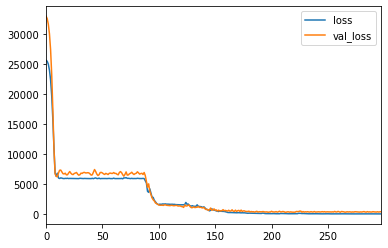

In [63]:
ann_regression_df = pd.DataFrame(ann_regression.history.history)
ann_regression_df[["loss","val_loss"]].plot()

In [64]:
ann_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                143       
                                                                 
 dense_13 (Dense)            (None, 9)                 108       
                                                                 
 dense_14 (Dense)            (None, 6)                 60        
                                                                 
 dense_15 (Dense)            (None, 4)                 28        
                                                                 
 dense_16 (Dense)            (None, 11)                55        
                                                                 
 dense_17 (Dense)            (None, 8)                 96        
                                                                 
 dense_18 (Dense)            (None, 8)                

In [65]:
ann_regression.evaluate(x_train,y_train)

7/7 [==============================] - 0s 640us/step - loss: 129.3265


129.3265380859375

In [66]:
ann_regression_df.to_csv(export_data_path+"LOSS_VALUES.csv")

In [67]:
ann_file = 'ann_model.h5'
ann_regression.save(model_path+ann_file)


###  ALL MODELS TRAINED ARE LOCATED AT THE LOCATION DEFINED BY USER AT CELL 2


.......................................THE END..........................................................